# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
# Add code here 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_airbnb_data.csv')


In [3]:
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,...,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,...,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.74
3,3,44391,https://www.airbnb.com/rooms/44391,20250609011745,2025-06-17,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,4,47061,https://www.airbnb.com/rooms/47061,20250609011745,2025-06-17,city scrape,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",NaN,https://a0.muscache.com/pictures/268343/a08ce2...,...,4.90,4.85,4.63,0363 1266 8C04 4133 E6AC,f,1,1,0,0,1.13


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



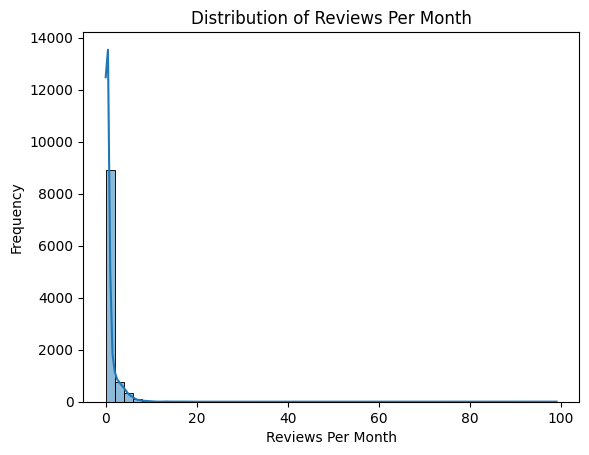

In [17]:
# Add code here 🔧
sns.histplot(data=df, x='reviews_per_month', kde=True, bins=50)
plt.title('Distribution of Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Frequency')
plt.show()

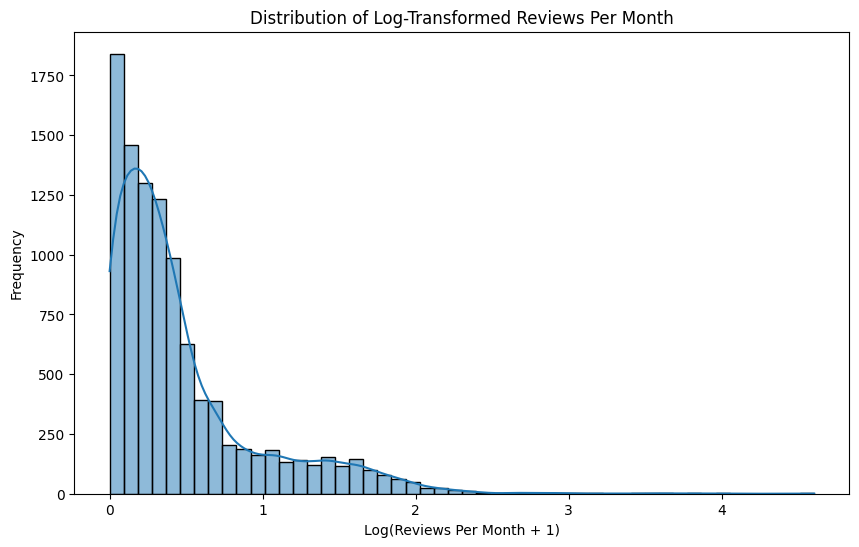

In [16]:
df['reviews_per_month_log'] = np.log1p(df['reviews_per_month'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reviews_per_month_log', kde=True, bins=50)
plt.title('Distribution of Log-Transformed Reviews Per Month')
plt.xlabel('Log(Reviews Per Month + 1)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the reviews_per_month column

2. I tried a log transformation to compress the values on the right hand side to make the data less skewed and easier to read.

3. From a visual standpoint you can now read the datapoints instead of having too big of a histogram to identify the specific reviews per month count.


## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    10168 non-null  int64  
 1   id                                            10168 non-null  int64  
 2   listing_url                                   10168 non-null  object 
 3   scrape_id                                     10168 non-null  int64  
 4   last_scraped                                  10168 non-null  object 
 5   source                                        10168 non-null  object 
 6   name                                          10168 non-null  object 
 7   description                                   9859 non-null   object 
 8   neighborhood_overview                         5258 non-null   object 
 9   picture_url                                   10168 non-null 

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale
cols_to_scale = ['price', 'maximum_minimum_nights']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[cols_to_scale])

df['price_scaled'] = df_scaled[:, 0]
# Z-score scale



In [31]:
# Z-score scale
scaler_zscore = StandardScaler()
df['maximum_minimum_nights_zscore'] = scaler_zscore.fit_transform(df[['maximum_minimum_nights']])

# Display the first few rows with the new column
display(df[['maximum_minimum_nights', 'maximum_minimum_nights_zscore']].head())

,maximum_minimum_nights,maximum_minimum_nights_zscore
0,0.002,-0.093179
1,0.001,-0.146176
2,0.001,-0.146176
3,0.002,-0.093179
4,0.001,-0.146176


In [40]:
display(df[['price', 'price_scaled', 'maximum_minimum_nights', 'maximum_minimum_nights_zscore']].head())

,price,price_scaled,maximum_minimum_nights,maximum_minimum_nights_zscore
0,0.001550,0.001550,0.002,-0.093179
1,0.000875,0.000875,0.001,-0.146176
2,0.000775,0.000775,0.001,-0.146176
3,NaN,NaN,0.002,-0.093179
4,0.001400,0.001400,0.001,-0.146176


### ✍️ Your Response: 🔧


1. I scaled the price column and the maximum_minimum_nights columns. Using the max min for the price and the z-score for the max_min_nights.

2. These scaled columns could be more useful when needing to compare the two columns because they are both now scaled for easier interpretation.

3. Data anaylsts and other people listing their properties on airbnb may use this data to see what an optimal listing price may be.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [41]:
# Add code here 🔧
df['review_scores_rating_group'] = pd.cut(df['review_scores_rating'], bins=3, labels=['Low', 'Medium', 'High'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Unnamed: 0                                    10168 non-null  int64   
 1   id                                            10168 non-null  int64   
 2   listing_url                                   10168 non-null  object  
 3   scrape_id                                     10168 non-null  int64   
 4   last_scraped                                  10168 non-null  object  
 5   source                                        10168 non-null  object  
 6   name                                          10168 non-null  object  
 7   description                                   9859 non-null   object  
 8   neighborhood_overview                         5258 non-null   object  
 9   picture_url                                   1016

### ✍️ Your Response: 🔧
1. I grouped the review_scores_rating and made three columns within.

2. Viewing this grouped version of the column could be more valuable for identifying a general range of satisfaction for the airbnb instead of having to look at the relativity of the numbers that the review scores had.

3. The airbnb owners and the data analysts that are trying to identify where reviews are higher and lower in certain locations, price points, etc.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [45]:
# Add code here 🔧
df['cost_per_night'] = df['price'] / df['minimum_nights']

# Display the first few rows with the new column
display(df[['price', 'minimum_nights', 'cost_per_night']].head())

,price,minimum_nights,cost_per_night
0,0.001550,3,0.000517
1,0.000875,2,0.000437
2,0.000775,2,0.000387
3,NaN,3,NaN
4,0.001400,2,0.000700


In [44]:
# Create a flag for stays longer than 30 days
df['long_stay_flag'] = np.where(df['minimum_nights'] > 30, 1, 0)

# Display the first few rows with the new column
display(df[['minimum_nights', 'long_stay_flag']].head())

,minimum_nights,long_stay_flag
0,3,0
1,2,0
2,2,0
3,3,0
4,2,0


### ✍️ Your Response: 🔧 🔧
1. I created what was suggested with the cost per night and the long stay flag for over 30 days at the airbnb. I am unsure on how to change my price variable back to what is was and I am extremely disgruntled with how I changed my dataset and do not know how to change it back, so I am not going to change it and sorry for the odd data.

2. The customers could use the cost per night or other managers. As well as, airbnb hosts would want to know what listings are being occupied by people for over 30 days at a time.

3. Identifying the cost per night could be used for calculations on where to increase or decrease other pricing.
Identifying long stays can aid in grouping different customers and listings.





## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [47]:
# Add code here 🔧
df_encoded = pd.get_dummies(df, columns=['room_type'], prefix='rt')
df_encoded.filter(like='rt_').head()


,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,True,False,False,False
4,True,False,False,False


### ✍️ Your Response: 🔧
1. I encoded room type, to quickly identify a True or false on the different types of rooms.
2. I used one-hot encoding because it is either a true or false statement for the room type.
3. Based on the true or false for a certain column the dashboard would display/ or the pricing model would change based on whether the room type has certain amenities or is a certain type of room.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Creating new variables felt the most important because of using your analytical understanding to create variables that could aid the company's sales.

2. Identifying the room types could be very useful with my one-hot encoding making distiguishing room types very easy.

3. I would create a room type/cost per night/location, dashboard to identify the where the highest/lowest paying airbnb's are based on those variables.
4. This relates to my customized outcomes with skiing and environmentalism with utilizing the creation of new variables to explore different relations within the world.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [48]:
!jupyter nbconvert --to html "assignment_07_HunterDaxton.ipynb"

[NbConvertApp] Converting notebook assignment_07_HunterDaxton.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 444749 bytes to assignment_07_HunterDaxton.html
